In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [17]:
x = tf.Variable(3,name = "x")
y = tf.Variable(4,name = "y")
f = x*x*y + y +2
sess = tf.compat.v1.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
result

42

In [90]:
import numpy as np
import struct
import matplotlib.pyplot as plt
 
filename = 'train-labels-idx1-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()
 
index = 0
magic, numLabel = struct.unpack_from('>II' , buf , index)
print(magic,numLabel)
index += struct.calcsize('>II')

for ii in range(10000):
    label = struct.unpack_from('>1B' ,buf, index)
    index += struct.calcsize('>1B')
    if ii == 0:
        y_train = np.array(list(label))
    else:
        y_train = np.vstack([y_train,label])
binfile.close()

filename = 'train-images-idx3-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()
 
index = 0
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)
print(magic,numImages,numRows,numColumns)
index += struct.calcsize('>IIII')

for ii in range(10000):
    im = struct.unpack_from('>784B' ,buf, index)
    index += struct.calcsize('>784B')
    if ii == 0:
        x_train = np.array(list(im))
    else:
        x_train = np.vstack([x_train,im])
binfile.close()

2049 60000
2051 60000 28 28


In [91]:
filename = 't10k-labels-idx1-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()
 
index = 0
magic, numLabel = struct.unpack_from('>II' , buf , index)
print(magic,numLabel)
index += struct.calcsize('>II')

for ii in range(5000):
    label = struct.unpack_from('>1B' ,buf, index)
    index += struct.calcsize('>1B')
    if ii == 0:
        y_test = np.array(list(label))
    else:
        y_test = np.vstack([y_test,label])
binfile.close()

filename = 't10k-images-idx3-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()
 
index = 0
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)
print(magic,numImages,numRows,numColumns)
index += struct.calcsize('>IIII')

for ii in range(5000):
    im = struct.unpack_from('>784B' ,buf, index)
    index += struct.calcsize('>784B')
    if ii == 0:
        x_test = np.array(list(im))
    else:
        x_test = np.vstack([x_test,im])
binfile.close()

2049 10000
2051 10000 28 28


In [92]:
#x_train

In [93]:
#x_test

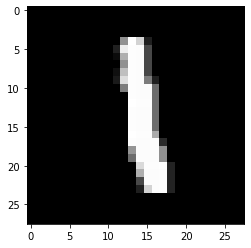

[1]


In [94]:
def plotonedigtal(x_one,y_one):
    im = np.array(x_one).reshape(28,28)
    plt.imshow(im,'gray')
    plt.show()
    print(y_one)

plotonedigtal(x_train[6],y_train[6])

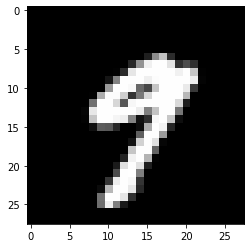

[9]


In [95]:
plotonedigtal(x_test[20],y_test[20])

In [96]:
x_test_1 = x_test / 255.0
x_train_1 = x_train / 255.0

In [97]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [98]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
print(x_test_1.shape)
print(y_test.shape)

(5000, 784)
(5000, 1)


In [100]:
x_train
model.fit(x_train_1,y_train,epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.5095 - accuracy: 0.8610
Epoch 2/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.2383 - accuracy: 0.9328
Epoch 3/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1743 - accuracy: 0.9518
Epoch 4/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1352 - accuracy: 0.9619
Epoch 5/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1053 - accuracy: 0.9709
Epoch 6/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0809 - accuracy: 0.9789
Epoch 7/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0637 - accuracy: 0.9837
Epoch 8/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0511 - accuracy: 0.9869
Epoch 9/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0404 - accuracy: 0.9913
Epoch 10/10
10

In [101]:
print(x_train_1.shape)
print(y_train.shape)

(10000, 784)
(10000, 1)


In [102]:
test_loss, test_acc = model.evaluate(x_test_1, y_test)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9362


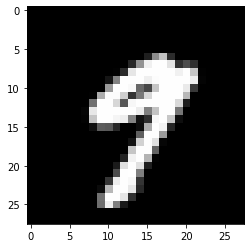

[9]


array([1.1100819e-06, 1.7367270e-07, 3.0658736e-08, 5.2850402e-05,
       5.9307113e-05, 3.4780831e-05, 7.9371015e-12, 6.9122901e-03,
       4.5601711e-05, 9.9289387e-01], dtype=float32)

In [104]:
predictions = model.predict(x_test_1)

plotonedigtal(x_test[20],y_test[20])
predictions[20]

In [105]:
tf.nn.softmax(predictions).numpy()

AttributeError: 'Tensor' object has no attribute 'numpy'